<a href="https://colab.research.google.com/github/Kaiaysez/Estimating-potting-probability-in-billiards/blob/main/Pool_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os # Iterate through directories and join paths
import cv2 # For doing image operations
import tensorflow as tf
from tensorflow import keras
import pickle
import random


"""Specifying data directory, formating images and visualizing images."""

DATADIR =  "/content/drive/MyDrive"
CATEGORIES = ["Missed","Potted"]

IMG_SIZE = 150 # Constant for resizing image

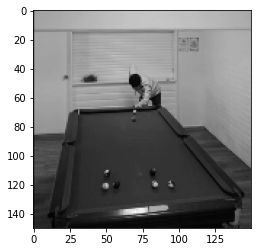

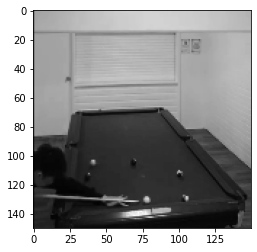

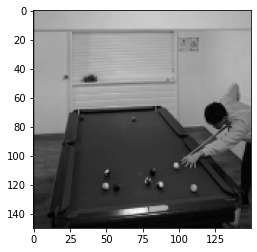

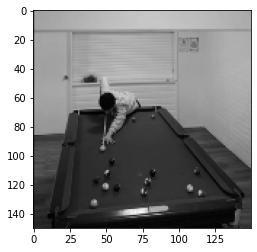

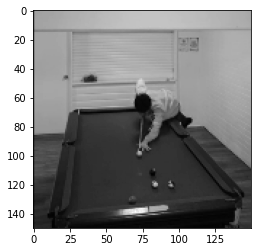

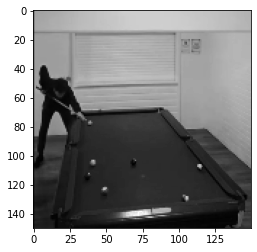

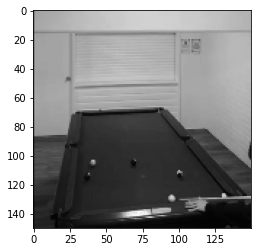

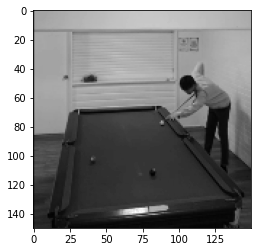

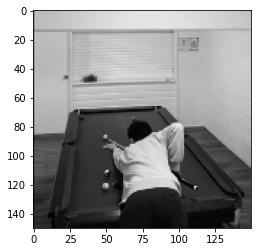

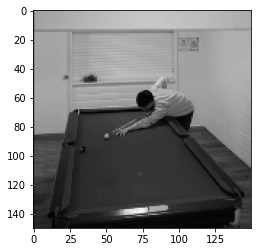

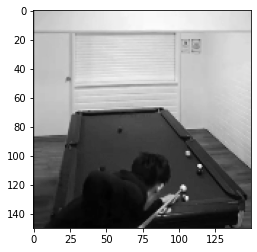

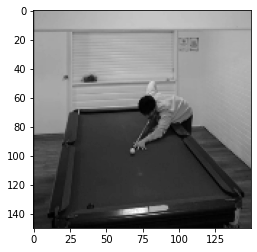

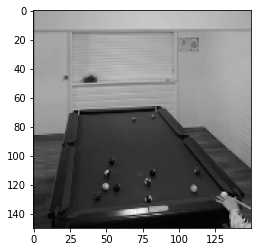

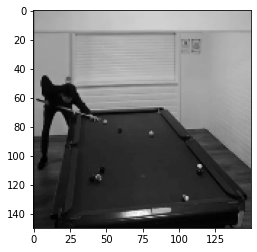

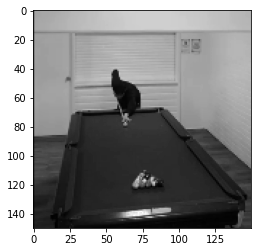

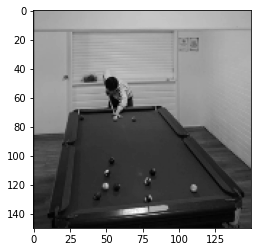

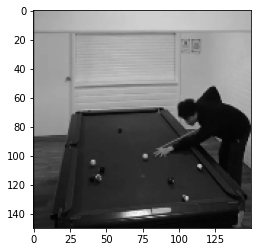

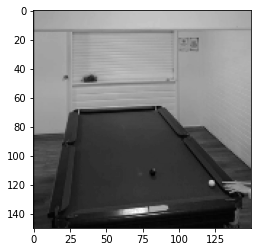

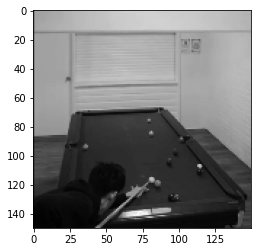

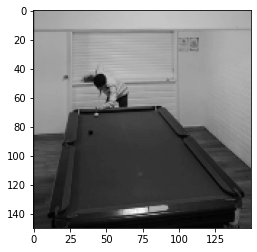

In [2]:
count = 20 # Number of pictures to display for exploratory visualization purposes
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
    for img in os.listdir(path): # For each image in the Miss/Success folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                # the images will be extremely blurry. I am guessing 
                                                                # that the resizing is done via some sort of filter.
        plt.imshow(img_array, cmap = "gray") # Show the image represented by img_array
        plt.show()
        count = count - 1
        if count == 0:
            break
    break

In [3]:
training_data = [] # List containing [image,class] lists where image is a matrix, and class is 0 or 1
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
        class_no = CATEGORIES.index(category) # The index of category in the list CATEGORIES
        for img in os.listdir(path): # For each image in the Miss/Success folder
            #img_array = cv2.imread(os.path.join(path,img))
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
            img_array = img_array[415:784,370:762] # Cropping the image
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                    # the images will be extremely blurry. I am guessing 
                                                                    # that the resizing is done via some sort of filter.
            training_data.append([new_array, class_no]) # Append training_data with a list containing the image, and the
                                                        # class it belongs to
            
create_training_data()
    

random.shuffle(training_data)

X = [] # features (every pixel is a feature, so we have 150x150 = 22500 features)
y = [] # labels
for images,labels in training_data:
    X.append(images)
    y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X = X/255
y = np.array(y)
# y = tf.one_hot(y, depth=2)

In [ ]:
y.shape
#X.shape

(157,)

In [48]:

"""
model = keras.Sequential([
   keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(IMG_SIZE,IMG_SIZE,1)),
   keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
   keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2, strides=2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(units=128, activation='relu'),
   keras.layers.Dense(units=2, activation='softmax')
])

"""
"""
model = keras.Sequential([
   keras.layers.Conv2D(20, 3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),   
   #keras.layers.BatchNormaliza0tion(),
   keras.layers.MaxPool2D(3,1), # (Size,Stride)
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(40, 3, activation='relu'), # (No. of filters, kernel size)
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(80, 7, activation='relu'),
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),   
   keras.layers.Dropout(0.3),

   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(2, activation='softmax')
])

"""

""" VGG PERFORMS TERRIBLY
model = keras.Sequential([
   keras.layers.Conv2D(filters=50, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'), 
   keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 
 
   
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(64, activation='relu'),   
   keras.layers.Dense(2, activation='softmax')
])

"""

""" Alexnet is so-so, haven't tried tweaking it much
model = keras.Sequential([
   keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,3), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""
model = keras.Sequential([
   #keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2,input_shape=(IMG_SIZE,IMG_SIZE,1)),

   keras.layers.Conv2D(filters=80, kernel_size=19, strides=4, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=1),

   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])



model.compile(optimizer = "adam",
              #loss = keras.losses.BinaryCrossentropy(),  
              loss = keras.losses.SparseCategoricalCrossentropy(),           
              metrics = ["accuracy"])

model.fit(X,y, epochs = 2000, batch_size = 180)



Epoch 1/2000
2/2 [==============================] - 1s 67ms/step - loss: 1.4505 - accuracy: 0.5133
Epoch 2/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.7131 - accuracy: 0.4336
Epoch 3/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.7011 - accuracy: 0.5752
Epoch 4/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.6858 - accuracy: 0.5634
Epoch 5/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.6884 - accuracy: 0.5693
Epoch 6/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.6823 - accuracy: 0.5693
Epoch 7/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.6868 - accuracy: 0.5605
Epoch 8/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.6849 - accuracy: 0.5664
Epoch 9/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.6829 - accuracy: 0.5693
Epoch 10/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.6872 - accuracy: 0.5693
Epoch 11/

KeyboardInterrupt: ignored

In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 19, 19, 80)        28960     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 18, 18, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 18, 18, 128)       92288     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 9, 9, 128)        0         
 g2D)                                                            
                                                     

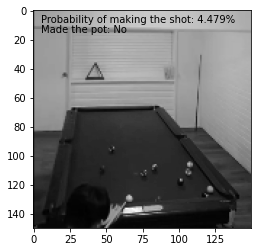

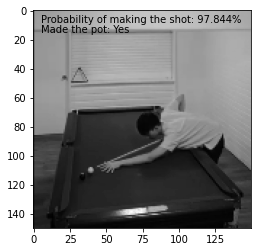

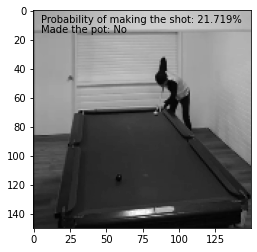

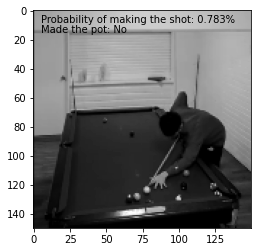

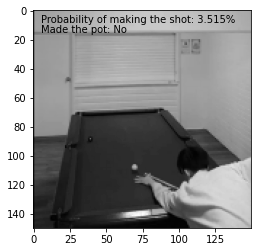

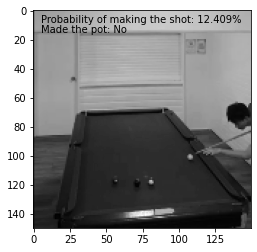

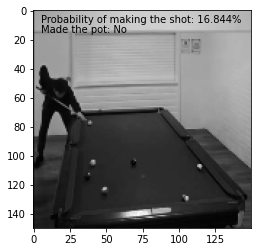

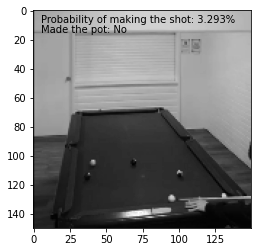

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [50]:

def predict(img_array,label = 2):
    plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE), cmap = "gray")
    #plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE,3))
    plt.annotate("Probability of making the shot: " +
                 str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                 #str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,3))[0][1]*100,3)) +
                 "%", (5,8))
    if label == 0:
        plt.annotate("Made the pot: No", (5,15))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,15))
    plt.show()
  
for i in range(len(X)):
  predict(X[i],y[i])

In [51]:
print(np.round(model.predict(X),3))

[[0.955 0.045]
 [0.022 0.978]
 [0.783 0.217]
 [0.992 0.008]
 [0.965 0.035]
 [0.876 0.124]
 [0.832 0.168]
 [0.967 0.033]
 [0.894 0.106]
 [0.606 0.394]
 [0.    1.   ]
 [0.099 0.901]
 [0.858 0.142]
 [0.633 0.367]
 [0.811 0.189]
 [0.579 0.421]
 [0.003 0.997]
 [0.979 0.021]
 [0.276 0.724]
 [0.873 0.127]
 [0.332 0.668]
 [0.998 0.002]
 [0.03  0.97 ]
 [0.062 0.938]
 [0.721 0.279]
 [0.229 0.771]
 [0.578 0.422]
 [0.075 0.925]
 [0.023 0.977]
 [0.75  0.25 ]
 [0.306 0.694]
 [0.979 0.021]
 [0.78  0.22 ]
 [0.766 0.234]
 [0.995 0.005]
 [0.395 0.605]
 [0.327 0.673]
 [0.55  0.45 ]
 [0.979 0.021]
 [0.034 0.966]
 [0.152 0.848]
 [0.962 0.038]
 [0.954 0.046]
 [0.144 0.856]
 [0.566 0.434]
 [0.546 0.454]
 [0.97  0.03 ]
 [0.826 0.174]
 [0.614 0.386]
 [0.873 0.127]
 [0.507 0.493]
 [0.397 0.603]
 [0.361 0.639]
 [0.648 0.352]
 [0.952 0.048]
 [0.19  0.81 ]
 [0.999 0.001]
 [0.556 0.444]
 [0.366 0.634]
 [0.603 0.397]
 [0.723 0.277]
 [0.007 0.993]
 [0.187 0.813]
 [0.957 0.043]
 [0.505 0.495]
 [0.002 0.998]
 [0.007 0.

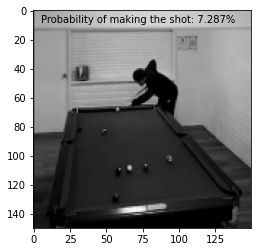

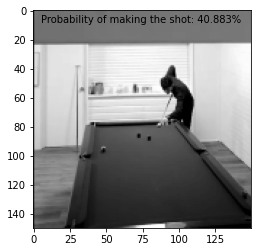

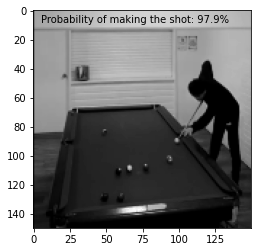

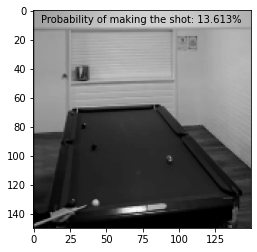

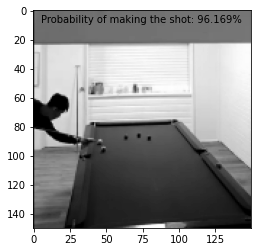

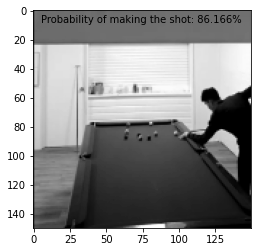

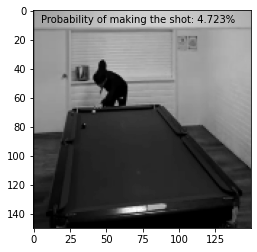

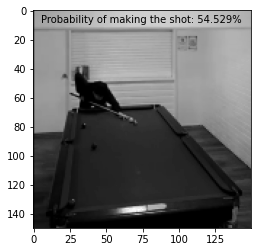

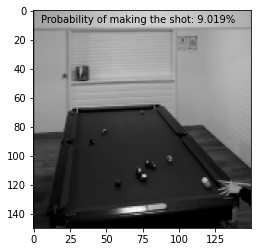

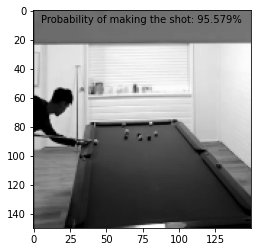

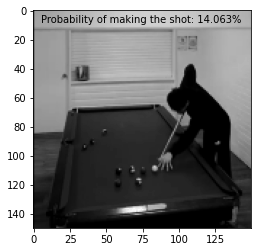

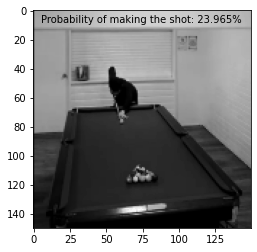

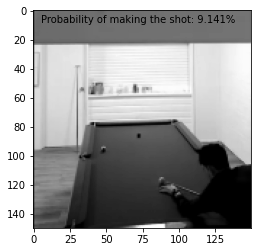

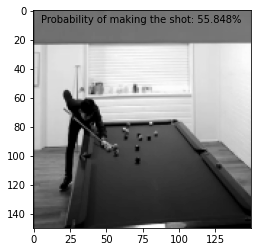

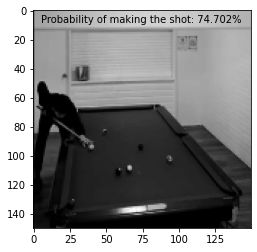

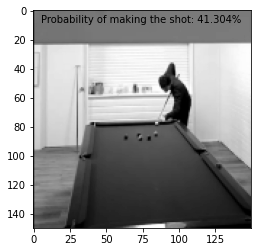

In [52]:
def format_images(image_path):
    formatted_images = []
    for img in os.listdir(image_path):
        img_array = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) 
        #img_array = cv2.imread(os.path.join(image_path,img))
        # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
        img_array = img_array/255 # Divide all pixel values by 255
        formatted_images.append(img_array)
    return formatted_images

test_images_f = format_images("/content/drive/MyDrive/f.files")
for i in range(len(test_images_f)):   
  predict(test_images_f[i])

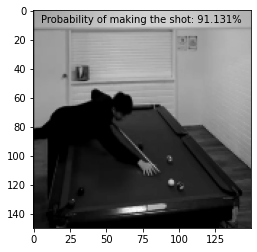

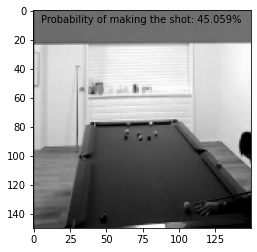

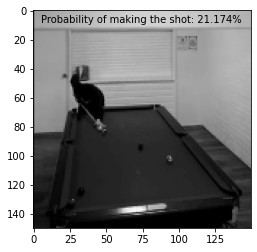

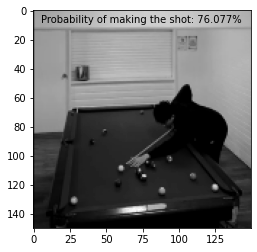

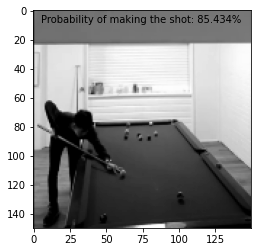

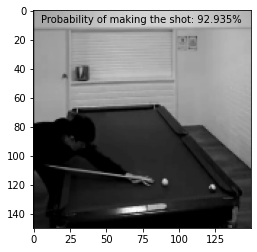

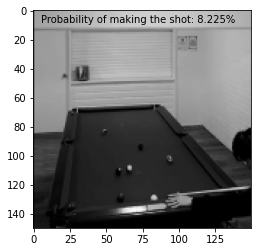

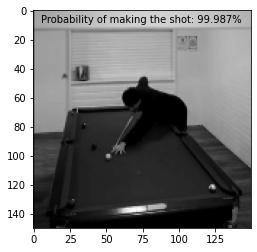

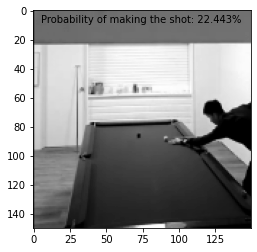

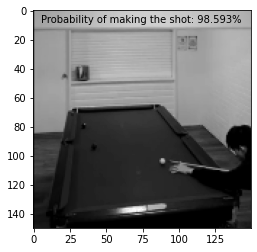

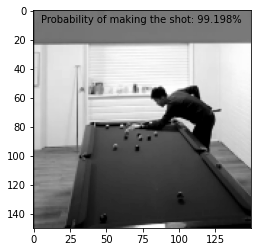

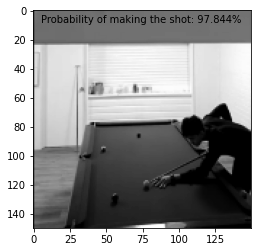

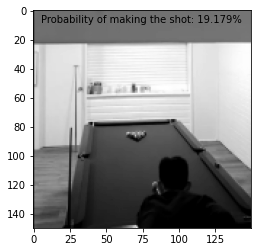

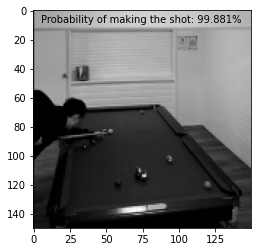

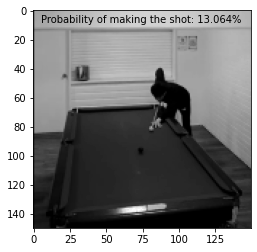

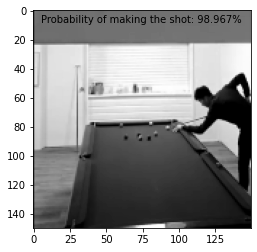

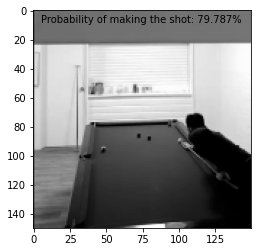

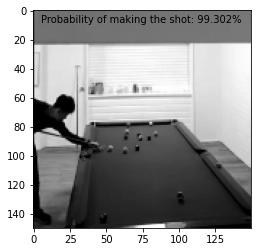

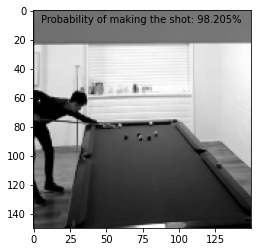

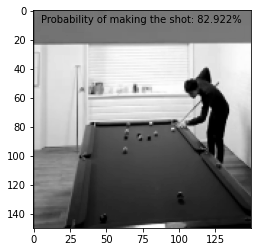

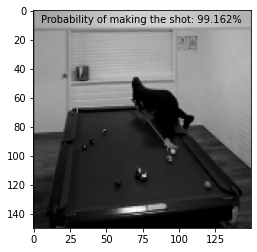

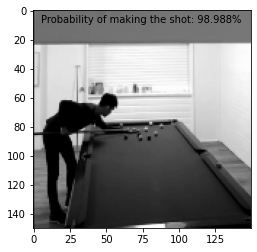

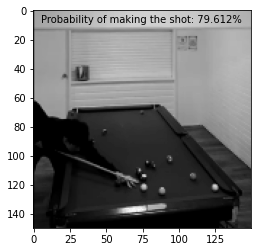

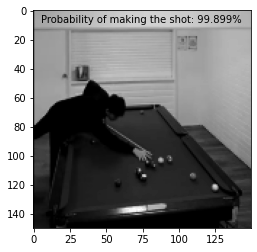

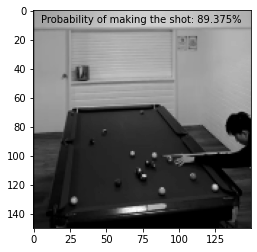

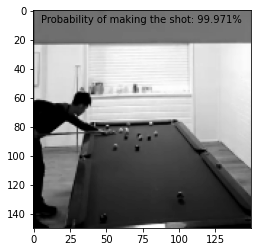

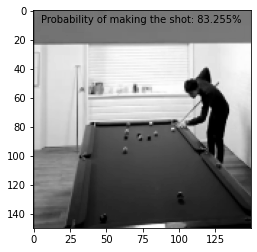

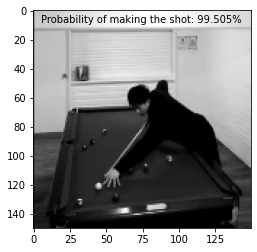

In [53]:
test_images_s = format_images("/content/drive/MyDrive/s.files")
for i in range(len(test_images_s)):   
  predict(test_images_s[i])

In [54]:
print("For unsuccessful shots:")
val_accuracy_f = model.evaluate(np.array(test_images_f), np.zeros(len(test_images_f)))

print("For successful shots:")
val_accuracy_s = model.evaluate(np.array(test_images_s), np.ones(len(test_images_s)))

For unsuccessful shots:
1/1 [==============================] - 0s 172ms/step - loss: 1.0717 - accuracy: 0.5625
For successful shots:
1/1 [==============================] - 0s 35ms/step - loss: 0.4167 - accuracy: 0.7857
